#METHODOLOGY FOR ATTACKING AES USING CNN


We are using the ASCAD dataset in which the traces are obtained from the output of the first S-box. So we need the s-box to precompute the target labels corresponding to various key hypothesis.


In [ ]:
AES_sbox=[
    0x63,0x7c,0x77,0x7b,0xf2,0x6b,0x6f,0xc5,0x30,0x01,0x67,0x2b,0xfe,0xd7,0xab,0x76,
    0xca,0x82,0xc9,0x7d,0xfa,0x59,0x47,0xf0,0xad,0xd4,0xa2,0xaf,0x9c,0xa4,0x72,0xc0,
    0xb7,0xfd,0x93,0x26,0x36,0x3f,0xf7,0xcc,0x34,0xa5,0xe5,0xf1,0x71,0xd8,0x31,0x15,
    0x04,0xc7,0x23,0xc3,0x18,0x96,0x05,0x9a,0x07,0x12,0x80,0xe2,0xeb,0x27,0xb2,0x75,
    0x09,0x83,0x2c,0x1a,0x1b,0x6e,0x5a,0xa0,0x52,0x3b,0xd6,0xb3,0x29,0xe3,0x2f,0x84,
    0x53,0xd1,0x00,0xed,0x20,0xfc,0xb1,0x5b,0x6a,0xcb,0xbe,0x39,0x4a,0x4c,0x58,0xcf,
    0xd0,0xef,0xaa,0xfb,0x43,0x4d,0x33,0x85,0x45,0xf9,0x02,0x7f,0x50,0x3c,0x9f,0xa8,
    0x51,0xa3,0x40,0x8f,0x92,0x9d,0x38,0xf5,0xbc,0xb6,0xda,0x21,0x10,0xff,0xf3,0xd2,
    0xcd,0x0c,0x13,0xec,0x5f,0x97,0x44,0x17,0xc4,0xa7,0x7e,0x3d,0x64,0x5d,0x19,0x73,
    0x60,0x81,0x4f,0xdc,0x22,0x2a,0x90,0x88,0x46,0xee,0xb8,0x14,0xde,0x5e,0x0b,0xdb,
    0xe0,0x32,0x3a,0x0a,0x49,0x06,0x24,0x5c,0xc2,0xd3,0xac,0x62,0x91,0x95,0xe4,0x79,
    0xe7,0xc8,0x37,0x6d,0x8d,0xd5,0x4e,0xa9,0x6c,0x56,0xf4,0xea,0x65,0x7a,0xae,0x08,
    0xba,0x78,0x25,0x2e,0x1c,0xa6,0xb4,0xc6,0xe8,0xdd,0x74,0x1f,0x4b,0xbd,0x8b,0x8a,
    0x70,0x3e,0xb5,0x66,0x48,0x03,0xf6,0x0e,0x61,0x35,0x57,0xb9,0x86,0xc1,0x1d,0x9e,
    0xe1,0xf8,0x98,0x11,0x69,0xd9,0x8e,0x94,0x9b,0x1e,0x87,0xe9,0xce,0x55,0x28,0xdf,
    0x8c,0xa1,0x89,0x0d,0xbf,0xe6,0x42,0x68,0x41,0x99,0x2d,0x0f,0xb0,0x54,0xbb,0x16
]


Accessing various Profiling and Attack data and metadata from the dataset.

Note: I have uploaded the ASCAD.h5 dataset from my system that I downloaded earliar.

In [ ]:
import h5py
import numpy as np
from tqdm import tqdm

def load_ascad(ascad_database_file):
    # Open the dataset
    f = h5py.File(ascad_database_file, "r")

    # Extract Profiling Data
    X_profiling = f['Profiling_traces/traces'][()]   # Profiling traces (training)
    Y_profiling = f['Profiling_traces/labels'][()]   # Corresponding labels

     # Extract Key & Plaintext for Profiling Traces
    meta_profile = f['Profiling_traces/metadata'][()]    # Metadata (plaintext, key, etc.)
    real_key1 = meta_profile['key'][0, :]              # Known encryption key
    pt_profile = meta_profile['plaintext']

    # Extract Attack Data
    X_attack = f['Attack_traces/traces'][()]         # Attack traces
    meta_attack = f['Attack_traces/metadata'][()]    # Metadata (plaintext, key, etc.)

    # Extract Key & Plaintext for Attack Traces
    real_key = meta_attack['key'][0, :]              # Known encryption key
    pt_attack = meta_attack['plaintext']             # Plaintext values

    targets = np.zeros((X_attack.shape[0], 256), dtype='uint8')
    for i in tqdm(range(X_attack.shape[0])):
        for k in range(256):
            targets[i, k] = AES_sbox[k^pt_attack[i,2]]


    # Return all extracted components
    return X_profiling, Y_profiling, X_attack, pt_attack, targets, real_key[2]

# Load dataset
dataset_path = "/content/ASCAD.h5"
X_profiling, Y_profiling, X_attack, pt_attack, targets, real_key= load_ascad(dataset_path)

# Print dataset shape
print("Profiling traces shape:", X_profiling.shape)
print("Profiling labels shape:", Y_profiling.shape)
print("Attack traces shape:", X_attack.shape)
print("Plaintext shape:", pt_attack.shape)
print("Real key[2]:", real_key)

100%|██████████| 10000/10000 [00:01<00:00, 6094.54it/s]

Profiling traces shape: (50000, 700)
Profiling labels shape: (50000,)
Attack traces shape: (10000, 700)
Plaintext shape: (10000, 16)
Real key[2]: 224


In [ ]:
f = h5py.File("/content/ASCAD.h5", "r")
meta_profile = f['Profiling_traces/metadata'][()]    # Metadata (plaintext, key, etc.)
real_key1 = meta_profile['key'][0, :]              # Known encryption key
pt_profile = meta_profile['plaintext']

In [ ]:
real_key

np.uint8(224)

In [ ]:
pt_profile[0][0]

np.uint8(6)

In [ ]:
state_byte = pt_profile[0][2] ^ real_key
state_byte = int(state_byte)
sbox_output = AES_sbox[state_byte]
sbox_output

38

In [ ]:
Y_profiling[0]

np.int64(38)

The above cell outputs indicate that the labels (corresponding to the traces) have been provided for the 3rd byte of the Plaintext and the Key and hence we will be recoverig the 3rd byte of the key.


###Traces before standardization, looks like these


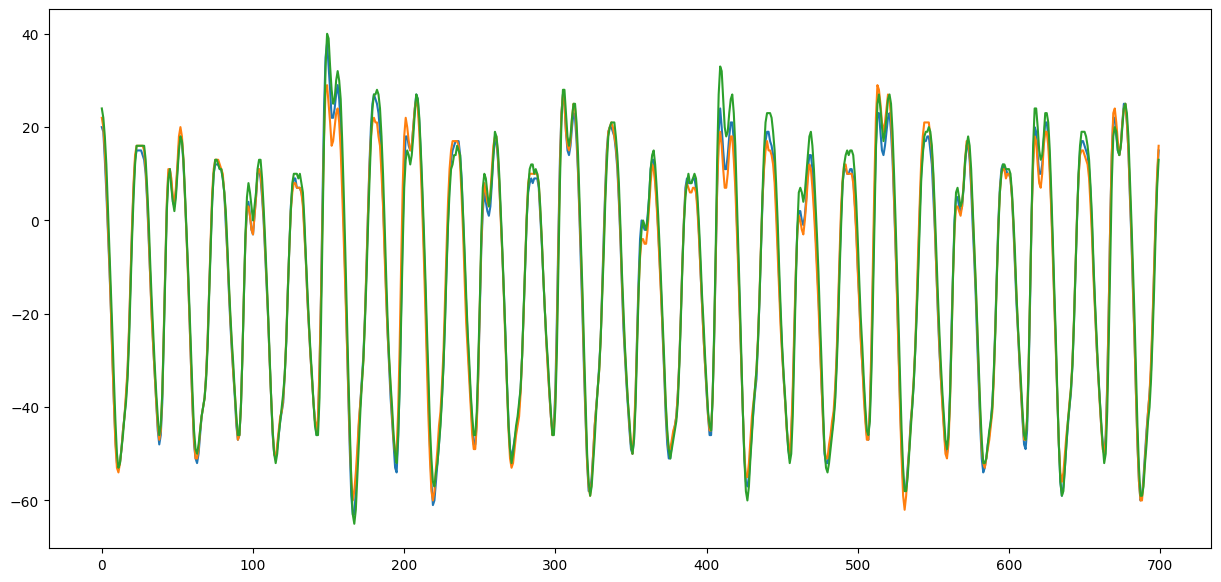

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 7))

x = range(X_profiling.shape[1])

for i in range(3):
    plt.plot(x, X_profiling[i])

###Standardizing the traces

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler=StandardScaler()

# Normalize profiling and attack traces
X_profiling_norm = scaler.fit_transform(X_profiling)
X_attack_norm = scaler.transform(X_attack)

# # Shuffle the profiling dataset
# shuffle_indices = np.random.permutation(len(X_profiling_norm))
# X_profiling_norm = X_profiling_norm[shuffle_indices]
# Y_profiling = Y_profiling[shuffle_indices]

print("Preprocessing Done ✅")
print("Profiling Traces Shape:", X_profiling_norm.shape)
print("Attack Traces Shape:", X_attack_norm.shape)

Preprocessing Done ✅
Profiling Traces Shape: (50000, 700)
Attack Traces Shape: (10000, 700)


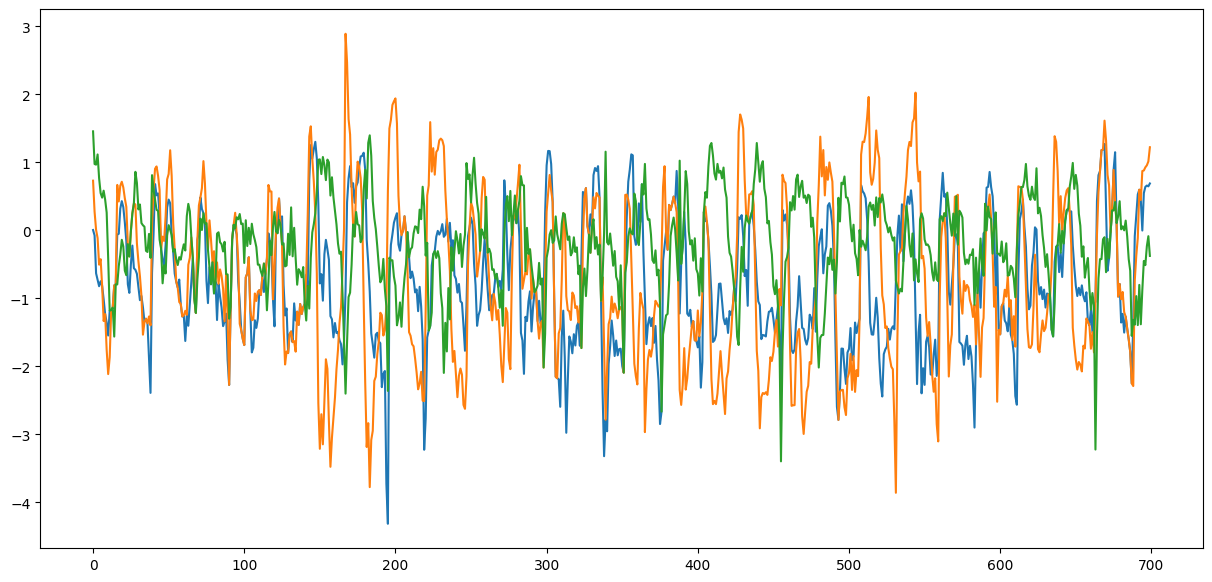

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 7))

x = range(X_profiling.shape[1])

for i in range(3):
    plt.plot(x, X_profiling_norm[i])

Splitting the data into training, testing and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split the profiling set into training (80%) and validation (20%)
X_train, X_val, Y_train, Y_val = train_test_split(X_profiling_norm, Y_profiling, test_size=0.2, random_state=42)

# Attack set will be used as the test set
X_test = X_attack_norm
Y_test = pt_attack  # We use plaintext to perform key rank evaluation

# Print shapes to confirm
print(f"Training Set: {X_train.shape}, Labels: {Y_train.shape}")
print(f"Validation Set: {X_val.shape}, Labels: {Y_val.shape}")
print(f"Test Set: {X_test.shape}, Plaintext: {Y_test.shape}")

Training Set: (40000, 700), Labels: (40000,)
Validation Set: (10000, 700), Labels: (10000,)
Test Set: (10000, 700), Plaintext: (10000, 16)


Defining the CNN model structure

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Dense, Flatten, BatchNormalization, AveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

def ascad_cnn(input_size=700, learning_rate=5e-4, classes=256):
    input_shape = (input_size, 1)
    img_input = Input(shape=input_shape)

    # 1st convolutional block
    x = Conv1D(4, kernel_size=1, activation='selu', padding='same', name='block1_conv1')(img_input)
    x = BatchNormalization()(x)
    x = AveragePooling1D(pool_size=2, strides=2, name='block1_pool')(x)

    # Flatten and dense layers
    x = Flatten(name='flatten')(x)
    x = Dense(10, activation='selu', name='fc1')(x)
    x = Dense(10, activation='selu', name='fc2')(x)

    # Output layer (softmax for classification)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model
    model = Model(img_input, x, name='ASCAD_CNN')
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [ ]:
model3=ascad_cnn()
model3.summary()

Model: "ASCAD_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 700, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv1D)                │ (None, 700, 4)              │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 700, 4)              │              16 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (AveragePooling1D)       │ (None, 350, 4)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 10)                  │          14,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictions (Dense)                  │ (None, 256)                 │           2,816 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,960 (66.25 KB)

 Trainable params: 16,952 (66.22 KB)

 Non-trainable params: 8 (32.00 B)

In [ ]:
nb_epochs = 50
learning_rate = 5e-3
batch_size = 50
tracesTrain, tracesVal, labelsTrain, labelsVal = train_test_split(X_profiling_norm, Y_profiling, test_size=0.1, random_state=0)

In [ ]:
tracesTrain_shaped = tracesTrain.reshape((tracesTrain.shape[0], tracesTrain.shape[1], 1))
tracesVal_shaped = tracesVal.reshape((tracesVal.shape[0], tracesVal.shape[1], 1))

Training the model

In [ ]:
history = model3.fit(x=tracesTrain_shaped, y=to_categorical(labelsTrain, num_classes=256), validation_data=(tracesVal_shaped, to_categorical(labelsVal, num_classes=256)), batch_size=batch_size, verbose=1, epochs=nb_epochs)

Epoch 1/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0041 - loss: 5.5702 - val_accuracy: 0.0034 - val_loss: 5.5530
Epoch 2/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0050 - loss: 5.5484 - val_accuracy: 0.0038 - val_loss: 5.5525
Epoch 3/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0044 - loss: 5.5432 - val_accuracy: 0.0048 - val_loss: 5.5515
Epoch 4/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0056 - loss: 5.5381 - val_accuracy: 0.0036 - val_loss: 5.5559
Epoch 5/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0062 - loss: 5.5359 - val_accuracy: 0.0054 - val_loss: 5.5548
Epoch 6/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0066 - loss: 5.5327 - val_accuracy: 0.0046 - val_loss: 5.5592
Epoch 7/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0063 - loss: 5.5301 - val_accuracy: 0.0052 - val_loss: 5.5598
Epoch 8/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0072 - loss: 5.5268 - val_accuracy: 0.

In [ ]:
n_traces = 4000
n_attack = 50
interval = 1

Function to create the array for the rank vs number of traces plot

In [ ]:
def rank(predictions, key, targets, ntraces, interval=10):
    ranktime = np.zeros(int(ntraces/interval))
    pred = np.zeros(256)

    idx = np.random.randint(predictions.shape[0], size=ntraces)

    for i, p in enumerate(idx):
        for k in range(predictions.shape[1]):
            pred[k] += predictions[p, targets[p, k]]

        if i % interval == 0:
            ranked = np.argsort(pred)[::-1]
            ranktime[int(i/interval)] = list(ranked).index(key)

    return ranktime

In [ ]:
tracesAttack_shaped = X_attack_norm.reshape((X_attack_norm.shape[0], X_attack_norm.shape[1], 1))
predictions = model3.predict(tracesAttack_shaped, verbose=1)
predictions = np.log(predictions+1e-40)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
predictions.shape

(10000, 256)

In [ ]:
ranks_model = np.zeros((n_attack, int(n_traces/interval)))
for i in tqdm(range(n_attack)):
    ranks_model[i] = rank(predictions, 224, targets, n_traces, interval)

100%|██████████| 50/50 [00:49<00:00,  1.00it/s]


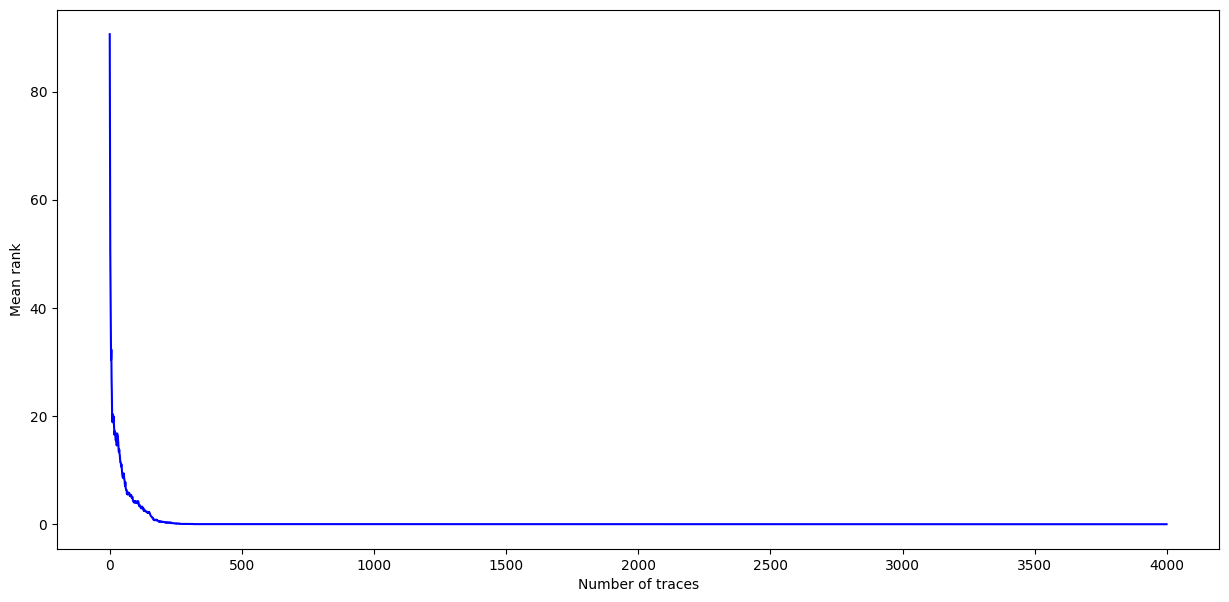

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
x = [x for x in range(0,n_traces,interval)]
ax.plot(x, np.mean(ranks_model, axis=0), 'b')

ax.set(xlabel='Number of traces', ylabel='Mean rank')
plt.show()

In [ ]:
n_traces=400
n_attack=100
interval=1
ranks_model = np.zeros((n_attack, int(n_traces/interval)))
for i in tqdm(range(n_attack)):
    ranks_model[i] = rank(predictions, 224, targets, n_traces, interval)

100%|██████████| 100/100 [00:12<00:00,  8.16it/s]


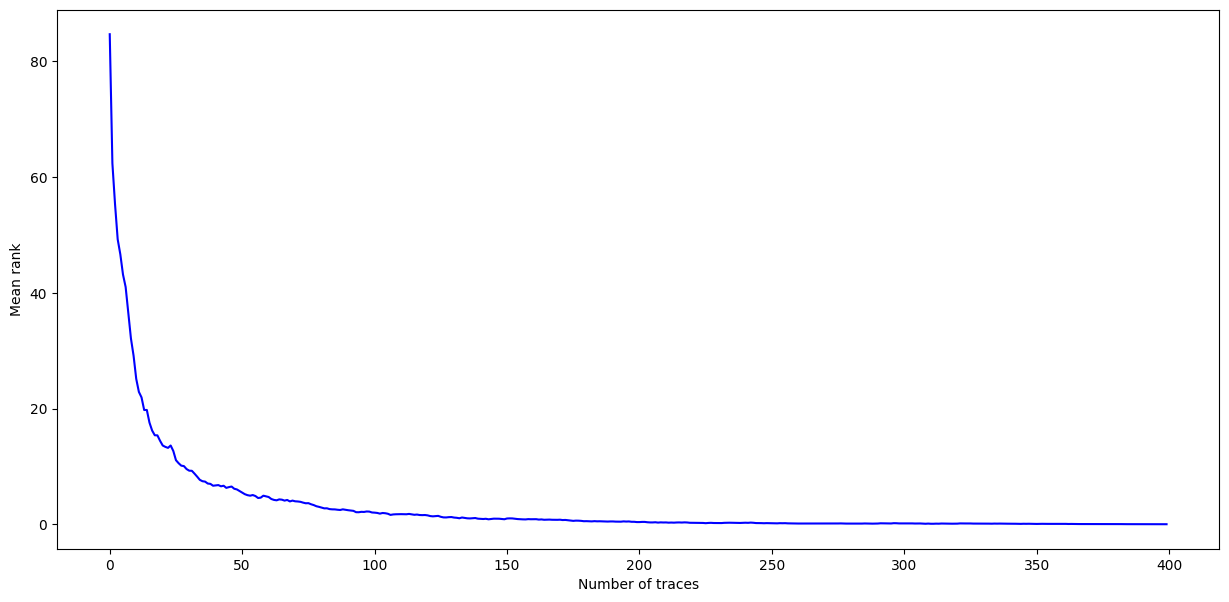

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
x = [x for x in range(0,n_traces,interval)]
ax.plot(x, np.mean(ranks_model, axis=0), 'b')

ax.set(xlabel='Number of traces', ylabel='Mean rank')
plt.show()

In [ ]:
def recover_key(predictions, targets, ntraces, interval=10):
    pred = np.zeros(256)  # Store confidence scores for each key guess

    for i in range(ntraces):
        for k in range(predictions.shape[1]):
            pred[k] += predictions[i, targets[i, k]]  # Accumulate confidence scores

    # Rank all possible keys by confidence
    ranked = np.argsort(pred)[::-1]  # Sort keys by confidence (highest first)
    best_key_guess = ranked[0]  # The most probable key is ranked at index 0

    return best_key_guess


In [ ]:
correct_key=recover_key(predictions, targets, n_traces, interval)
correct_key

np.int64(224)

Recovering Correct Key, and displaying the top 10 key guesses


In [ ]:
def recover_key(predictions, targets, ntraces):
    pred = np.zeros(256)  # Store confidence scores for each key guess

    for i in range(ntraces):
        for k in range(predictions.shape[1]):
            pred[k] += predictions[i, targets[i, k]]  # Accumulate confidence scores

    # Rank all possible keys by confidence
    ranked = np.argsort(pred)[::-1]  # Sort keys by confidence (highest first)

    # Print top 3 key guesses with confidence scores
    print("Top 10 Key Guesses and Confidence Scores:")
    for i in range(10):
        print(f"Key: {ranked[i]} | Score: {pred[ranked[i]]:.4f}")

    best_key_guess = ranked[0]  # The most probable key is ranked at index 0

    return best_key_guess


In [ ]:
best_key_guess = recover_key(predictions, targets, n_traces)
print(f"Most Probable Key: {best_key_guess}")


Top 10 Key Guesses and Confidence Scores:
Key: 224 | Score: -2132.2745
Key: 20 | Score: -2149.2606
Key: 192 | Score: -2149.6090
Key: 24 | Score: -2150.1419
Key: 64 | Score: -2154.6587
Key: 88 | Score: -2155.3663
Key: 0 | Score: -2156.4381
Key: 112 | Score: -2156.5358
Key: 232 | Score: -2157.9803
Key: 60 | Score: -2158.5930
Most Probable Key: 224


In [ ]:
print(ranks_model)

[[ 90.   5.  11. ...   0.   0.   0.]
 [ 40.  63.  53. ...   0.   0.   0.]
 [143. 101.  30. ...   0.   0.   0.]
 ...
 [ 56.  47.  32. ...   0.   0.   0.]
 [152.  46.   5. ...   0.   0.   0.]
 [ 94.   2.  13. ...   0.   0.   0.]]


In [ ]:
print(ranks_model.tolist())

[[90.0, 5.0, 11.0, 16.0, 8.0, 1.0, 2.0, 8.0, 15.0, 8.0, 5.0, 5.0, 7.0, 12.0, 15.0, 13.0, 15.0, 9.0, 12.0, 10.0, 6.0, 6.0, 6.0, 6.0, 7.0, 4.0, 4.0, 4.0, 6.0, 4.0, 4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0